# Optimization with Python (1)

## Linear programming (LP) 

Linear programming is the minimization (or maximization) of a linear objective subject to linear constraints. There are several widely adopted schemes for representing linear programming problems. Here we adopt a scheme corresponding where the linear objective is written in terms of decision variables $x_1, x_2, \ldots, x_N$ as

\begin{align}
\min_{\{x_1, x_1, \ldots, x_N \}} c_1x_1 + c_2x_2 + \cdots + c_Nx_N
\end{align}

subject to

\begin{align}
x_i  \geq 0 & \qquad i=1,\ldots,N\quad\mbox{lower bounds on decision variables}\\
\sum_{j=1}^N a^{ub}_{ij}x_j \leq b^{ub}_i & \qquad i=1,\ldots,M_{ub}\quad\mbox{upper bound constraints} \\
\sum_{j=1}^N a^{eq}_{ij}x_j = b^{eq}_i & \qquad i=1,\ldots,M_{eq}\quad\mbox{equality constraints}\\
\end{align}


### Matrix/Vector format

The notation can be simplified by adopting a matrix/vector formulation where

\begin{align}
\min_{x\geq 0} c^T x
\end{align}

subject to

\begin{align}
A_{ub} x \leq b_{ub} \\
A_{eq} x = b_{eq}
\end{align}

where $c$, $A_{ub}, b_{ub}$, and $A_{eq}, b_{eq}$, are vectors and matrices of coefficients constructed from the linear expressions given above.


### App in Scipy:

In scipy, the linear programming is implemented in **linprog** module. There are two methods: **simplex and interior-point**. The simplex method is more like a brute-force search algorithm, it has high complexity, therefore not suitable for high dimensional problem. The interior-point method is makeing the problem into primal-dual formulation and place a log barrier for the inequality constraints.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.optimize import linprog

## Example 1: Production

Suppose that a factory can produce two goods called **Product 1** and **Product 2**.

To produce each product requires both **material** and **labor**.

Selling each product generates **revenue**.

Required per unit material and labor inputs and revenues are shown in table below:

In [4]:
# Data
df = pd.DataFrame({' ' : ['Material', 'Labor', 'Revenue'],
        'Product 1' : [2, 4, 3],
        'Product 2' : [5, 2, 4]})
df

##Minimizar el valor negativo del ingreso = maximizar el ingreso 
##Min - R : 3x1 +4x2
## st ; 30 => 2x1 + 5x2 +x3
##      20 => 4x1 + 2x2 +x4

,,Product 1,Product 2
0,Material,2,5
1,Labor,4,2
2,Revenue,3,4


There are 30 units of material and 20 units of labor available.

**Problem:**
A firm’s problem is to construct a production plan that uses its 30 units of materials and 20 unites of labor to maximize its revenue.

Let $x_i$ denote the quantity of Product $i$ that the firm produces.

This problem can be formulated as:

$$ \max_{\{ x_1,x_2 \} } z =  3 x_1 + 4 x_2 $$
$$ \text{s.t.}\ 2 x_1 + 5 x_2 \leq 30 $$
$$ 4 x_1 + 2 x_2 \leq 20 $$
$$ x_1,\ x_2 \geq 0 $$

The following graph illustrates the firm’s constraints and iso-revenue lines:

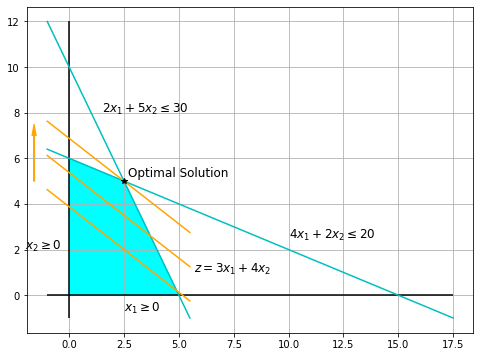

In [5]:
#@title
from matplotlib.patches import Polygon
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid()

# Draw constraint lines
ax.hlines(0, -1, 17.5)
ax.vlines(0, -1, 12)
ax.plot(np.linspace(-1, 17.5, 100), 6-0.4*np.linspace(-1, 17.5, 100), color="c")
ax.plot(np.linspace(-1, 5.5, 100), 10-2*np.linspace(-1, 5.5, 100), color="c")
ax.text(1.5, 8, "$2x_1 + 5x_2 \leq 30$", size=12)
ax.text(10, 2.5, "$4x_1 + 2x_2 \leq 20$", size=12)
ax.text(-2, 2, "$x_2 \geq 0$", size=12)
ax.text(2.5, -0.7, "$x_1 \geq 0$", size=12)

# Draw the feasible region
feasible_set = Polygon(np.array([[0, 0], 
                                 [0, 6], 
                                 [2.5, 5], 
                                 [5, 0]]), 
                       color="cyan")
ax.add_patch(feasible_set)

# Draw the objective function
ax.plot(np.linspace(-1, 5.5, 100), 3.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 5.375-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.plot(np.linspace(-1, 5.5, 100), 6.875-0.75*np.linspace(-1, 5.5, 100), color="orange")
ax.arrow(-1.6, 5, 0, 2, width = 0.05, head_width=0.2, head_length=0.5, color="orange")
ax.text(5.7, 1, "$z = 3x_1 + 4x_2$", size=12)

# Draw the optimal solution
ax.plot(2.5, 5, "*", color="black")
ax.text(2.7, 5.2, "Optimal Solution", size=12)

plt.show()

## Solution:

In [6]:
# Parametros de la función objetivo
c = np.array([3, 4])

# Restricciones de desigualdad
A = np.array([[2, 5],
                  [4, 2]])
b = np.array([30,20])

# Solución del problema
sol = linprog(-c, A_ub=A, b_ub=b)
sol

##Como se interpreta el resultado 
##El resultado es una aproximación númerica 
## x: array([2.5, 5. ]) solución optima 2.5 x1 y 5x2 (solución optima al problema)
##method = "revised simplex"  da una mejor aproximación

     con: array([], dtype=float64)
     fun: -27.49999999907403
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([8.43161985e-10, 9.11981601e-10])
  status: 0
 success: True
       x: array([2.5, 5. ])

## Example 2: Investment problem

Un fondo inversión tiene $\$100.000$ para invertir en un horizonte de tres años. Hay tres opciones de inversión disponibles:

**Anualidad**: el fondo puede destinar la misma cantidad de capital al comienzo de cada año y recibir un pago del 130% del capital total invertido al final del tercer año. Una vez que el fondo decide invertir en esta anualidad, debe seguir invirtiendo en todos los años subsiguientes en el horizonte de tres años.

**Cuenta bancaria**: el fondo puede depositar cualquier cantidad en un banco al principio de cada año y recibir su capital más el 6% de interés al final de ese año. Además, al fondo se le permite pedir prestado hasta \$20,000 al comienzo de cada año y se le pide que devuelva la cantidad prestada más el 6% de interés al final del año. El fondo puede elegir si depositar o pedir prestado al comienzo de cada año.

**Bono corporativo**: Al comienzo del segundo año está disponible un bono corporativo. El fondo puede comprar una cantidad que no supere los $50.000 de este bono al comienzo del segundo año y al final del tercer año recibir un pago del 130% de la cantidad invertida en el bono.

El objetivo del fondo es **maximizar el pago total que posee al final del tercer año**.

Podemos formular esto como un problema de programación lineal.

Sea $x_1$ la cantidad puesta en la anualidad, $x_2$, $x_3$, $x_4$ sean los saldos de los depósitos bancarios al comienzo de los tres años y $x_5$ la cantidad invertida en el bono corporativo.

Cuando $x_2$, $x_3$, $x_4$ son negativos, significa que el fondo mutuo ha tomado prestado del banco.

La siguiente tabla muestra las variables de decisión del fondo descrito anteriormente:

In [7]:
# Data
df = pd.DataFrame({' ' : ['Annuity', 'Bank account', 'Corporate bond'],
        'Year 1' : ['x_1', 'x_2', 0],
        'Year 2' : ['x_1', 'x_3', 'x_5'],
        'Year 3' : ['x_1', 'x_4', 0]})
df

,,Year 1,Year 2,Year 3
0,Annuity,x_1,x_1,x_1
1,Bank account,x_2,x_3,x_4
2,Corporate bond,0,x_5,0


La toma de decisiones del fondo procede de acuerdo con la siguiente secuencia de tiempo:

1. Al comienzo del primer año, el fondo decide cuánto invertir en la anualidad y cuánto depositar en el banco. Esta decisión está sujeta a la restricción:

$$ x_1 + x_2 = \$100.000 $$

2. Al comienzo del segundo año, el fondo tiene un saldo bancario de $1.06 x_2$. Debe mantener $x_1$ en la anualidad. Puede optar por poner $x_5$ en el bono corporativo y poner $x_3$ en el banco. Estas decisiones están restringidas por

$$ x_1 + x_5 = 1.06 x_2 - x_3 $$

3. Al inicio del tercer año, el fondo tiene un saldo en la cuenta bancaria igual a $1.06 x_3$. Debe invertir nuevamente $x_1$ en la anualidad, dejándolo con un saldo en cuenta bancaria igual a $x_4$. Esta situación se resume en la restricción:

$$ x_1 = 1.06 x_3 - x_4 $$

La **función objetivo** del fondo, es decir, su riqueza al final del tercer año es:

$$ 1,30 \cdot 3 x_1 + 1,06 x_4 + 1,30 x_5 $$

Así, el fondo enfrenta el programa lineal:

$$ \max_{\{ x \} }\  1.30 \cdot 3 x_1 + 1.06 x_4 + 1.30 x_5  $$
$$ \text{s.t.}\ x_1 + x_2 = \$100.000 $$
$$ x_1 - 1.06 x_2 + x_3 +  x_5 = 0 $$
$$ x_1 - 1.06 x_3 + x_4  = 0 $$
$$ x_2, x_3, x_4 \geq -\$20.000 $$
$$ x_5 \leq \$50.000 $$


In [8]:
# Parameters
rate = 1.06

# Objective function parameters
c2 = np.array([1.30*3, 0, 0, 1.06, 1.30])

# equality constraints
A2 = np.array([[1,  1,  0,  0,  0],
                  [1, -rate, 1, 0, 1],
                  [1, 0, -rate, 1, 0]])
b2 = np.array([100000, 0, 0])

# Bounds on decision variables
bounds2 = [(  0,    None),
              (-20000, None),
              (-20000, None),
              (-20000, None),
              (  0,   50000)]

# Solve the problem:
res2 = linprog(-c2, A_eq=A2, b_eq=b2,
                  bounds=bounds2, method='revised simplex')

res2

     con: array([ 1.45519152e-11, -2.18278728e-11,  0.00000000e+00])
     fun: -141018.24349792692
 message: 'Optimization terminated successfully.'
     nit: 4
   slack: array([], dtype=float64)
  status: 0
 success: True
       x: array([ 24927.75474306,  75072.24525694,   4648.8252293 , -20000.        ,
        50000.        ])

## Tareas: 

#### 1. Problema de asignación de recursos productivos:
Una empresa produce cuatro bienes diferentes y en cantidades diferentes: las cantidades producidas diariamente de los cuatro productos son $x_1$, $x_2$, $x_3$, $x_4$. Si la **ganancia** por unidad de cada uno es \$ 20, \$ 12, \$ 40 y \$ 25, respectivamente, encuentre la cantidad de producción total (diaria) que **maximiza las ganancias** para la empresa, teniendo en cuenta las siguientes condiciones:

* La mano de obra contrada solo permite producir un número máximo de unidades por día de cincuenta (50).
* Por cada unidad producida de cada uno se requieren las siguientes cantidades de materia prima A y de materia prima B: para el primer producto se necesitan solo tres (3) unidades de materia prima A; para el segundo producto requieren dos (2) unidades de la materia prima A y una (1) unidad de la materia prima B; para el tercer producto necesita una (1) unidad de materia prima A y dos (2) unidades de B. Finalmente, para el cuarto producto se requieren solo tres (3) unidades de materia prima B.

* Debido a la disponibilidad de transporte y almacenamiento en bodega, solo se pueden disponer diariamente cien (100) unidades de la materia prima A y noventa (90) unidades de B.

Formular y resolver el problema de optimización.


#### 2. Consulta optimizador CVXPY (Convex optimization). 
See its homepage cvxpy.
There are a few examples of its usages at https://www.cvxpy.org/examples/index.html
For linear programming, see https://www.cvxpy.org/examples/basic/linear_program.html

In [9]:
df = pd.DataFrame({' ' : ['QA', 'QB', 'Revenue'],
        'Product 1' : [3, 0, 20],
        'Product 2' : [2, 1, 12],
        'Product 3' : [1, 2, 40], 
        'Product 4' : [0, 3, 25]})
df

,,Product 1,Product 2,Product 3,Product 4
0,QA,3,2,1,0
1,QB,0,1,2,3
2,Revenue,20,12,40,25


In [10]:
# Parametros de la función objetivo
c = np.array([20, 12, 40, 25])

# Restricciones de desigualdad
A = np.array([[1, 1, 1, 1],
               [3, 2, 1, 0],
                  [0, 1, 2, 3]])
b = np.array([50,100,90])

# Bounds on decision variables
bounds2 = [(  0,    None)]

# Solve the problem:
res2 = linprog(-c, A_ub=A, b_ub=b,
                  bounds=bounds2, method='revised simplex')

res2

     con: array([], dtype=float64)
     fun: -1900.0
 message: 'Optimization terminated successfully.'
     nit: 2
   slack: array([ 0., 40.,  0.])
  status: 0
 success: True
       x: array([ 5.,  0., 45.,  0.])

In [13]:
import cvxpy as cp
n = 5
x = cp.Variable(n)
objective = cp.Minimize(-c2.T@ x)
constraints = [A2@x<= b2 , x[1:4] >=-20000 , x[4] <=50000]  
prob = cp.Problem(objective, constraints)

# The optimal objective value is returned by `prob.solve()`.
result = prob.solve()
# The optimal value for x is stored in `x.value`.
print(x.value)
# The optimal Lagrange multiplier for a constraint is stored in
x_sol = pd.DataFrame(x.value)
# `constraint.dual_value`.
print(round(x_sol.round(2)))

[ 24927.75492305  75072.24507695   4648.82539916 -19999.99999994
  49999.99945935]
         0
0  24928.0
1  75072.0
2   4649.0
3 -20000.0
4  50000.0


In [14]:
result  #rentabilidad maxima acumulada para el ejercicio

-141018.24349709204